# 🎯 Sonar Signal Classification: Rock vs Mine using KNN

## 📄 Dataset Overview

This dataset consists of sonar signal patterns collected by bouncing **frequency-modulated chirp signals** off objects—either **metal cylinders (mines)** or **rocks**. The goal is to classify each object based on the energy values measured across 60 frequency bands.

- **Total samples**: 208  
  - **111** patterns from **mines** (`M`)  
  - **97** patterns from **rocks** (`R`)
- **Features**: 60 continuous values ranging from **0.0 to 1.0**
- **Label**:  
  - `'M'` for **mine** (metal cylinder)  
  - `'R'` for **rock**

Each feature represents the energy level within a specific frequency band, integrated over time. The chirp signal rises in frequency, so **higher frequency bands correspond to later time windows**.

## 🧠 Objective

To build a classification model that can accurately distinguish between **mines** and **rocks** based on sonar frequency data. This involves:
- Performing **Exploratory Data Analysis (EDA)**
- Visualizing **frequency trends and correlations**
- Building and tuning a **K-Nearest Neighbors (KNN)** classifier
- Evaluating model performance using **confusion matrix**, **accuracy**, and **classification report**



### **Step 1: Understanding the Problem Statement**
The goal of this project is to develop a machine learning model that can classify sonar signal responses as either Rock (R) or Mine (M) based on 60 different frequency responses. We'll use the K-Nearest Neighbors (KNN) algorithm and optimize the model using GridSearchCV and Pipeline.

### **Step 2: Importing the Necessary Libraries**



In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### **Step 3: Loading the Dataset**



In [12]:
df = pd.read_csv('sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [14]:
# 1. Basic Info
print("📌 Dataset Shape:", df.shape)

📌 Dataset Shape: (208, 61)


In [16]:
print("\n🧾 Column Names:\n", df.columns.tolist())


🧾 Column Names:
 ['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7', 'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13', 'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19', 'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25', 'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31', 'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37', 'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43', 'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49', 'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55', 'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60', 'Label']


In [18]:
print("\n🧹 Missing Values:\n", df.isnull().sum())


🧹 Missing Values:
 Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64


In [31]:
## Descriptive Statistics
print("\n📊 Descriptive Statistics:\n", df.describe().T)


📊 Descriptive Statistics:
          count      mean       std     min       25%      50%       75%  \
Freq_1   208.0  0.029164  0.022991  0.0015  0.013350  0.02280  0.035550   
Freq_2   208.0  0.038437  0.032960  0.0006  0.016450  0.03080  0.047950   
Freq_3   208.0  0.043832  0.038428  0.0015  0.018950  0.03430  0.057950   
Freq_4   208.0  0.053892  0.046528  0.0058  0.024375  0.04405  0.064500   
Freq_5   208.0  0.075202  0.055552  0.0067  0.038050  0.06250  0.100275   
...        ...       ...       ...     ...       ...      ...       ...   
Freq_57  208.0  0.007820  0.005785  0.0003  0.003700  0.00595  0.010425   
Freq_58  208.0  0.007949  0.006470  0.0003  0.003600  0.00580  0.010350   
Freq_59  208.0  0.007941  0.006181  0.0001  0.003675  0.00640  0.010325   
Freq_60  208.0  0.006507  0.005031  0.0006  0.003100  0.00530  0.008525   
Target   208.0  0.533654  0.500070  0.0000  0.000000  1.00000  1.000000   

            max  
Freq_1   0.1371  
Freq_2   0.2339  
Freq_3   0.3059  

### **Step 4: Data Exploration**


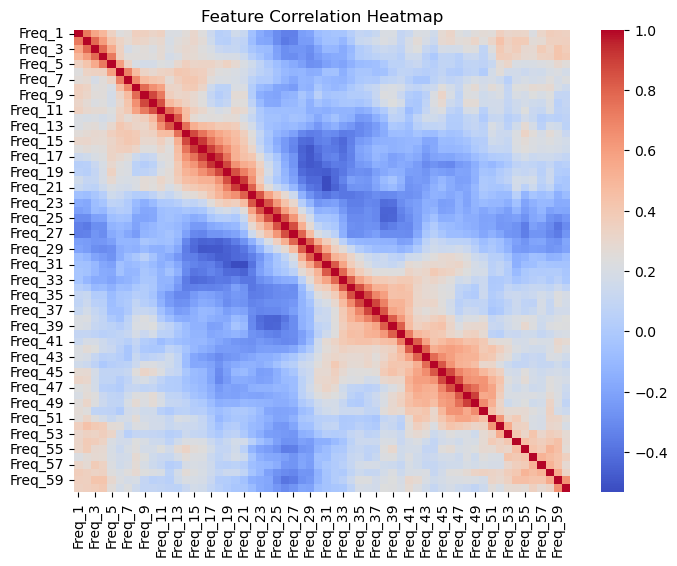

In [25]:
plt.figure(figsize=(8,6))

# Drop non-numeric columns before computing correlation
sns.heatmap(df.drop(columns=['Label']).corr(), cmap='coolwarm')

plt.title("Feature Correlation Heatmap")
plt.show()


In [29]:
df['Target'] = df['Label'].map({'R': 0, 'M': 1})  # Convert labels to numeric

# Drop the 'Label' column to avoid non-numeric issues
numeric_df = df.drop(columns=['Label'])

# Now, compute correlation
correlation_values = np.abs(numeric_df.corr()['Target']).sort_values()

# Display the top 6 correlated features
print(correlation_values.tail(6))


Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64


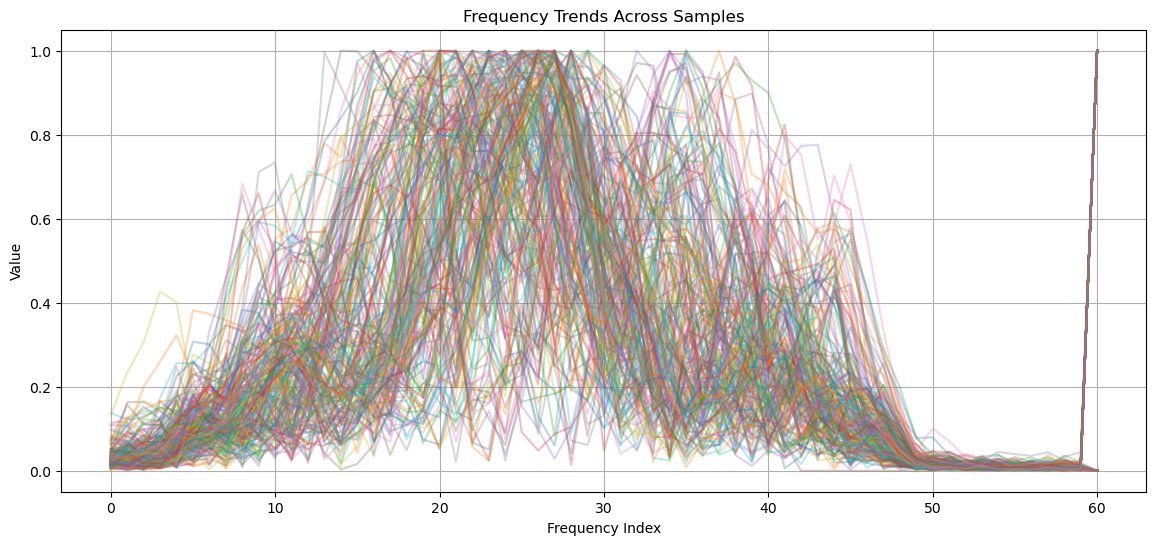

In [35]:
plt.figure(figsize=(14, 6))

# Drop 'Label' to ensure all values are numeric
numeric_df = df.drop(columns=['Label'])

for idx, row in numeric_df.iterrows():
    plt.plot(row.values, alpha=0.3, label=f'Sample {idx+1}' if idx < 5 else "")  # Limit legend

plt.title("Frequency Trends Across Samples")
plt.xlabel("Frequency Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


This graph shows how the frequency values change across the 58 frequency bands for each sample in the dataset. Each line represents one sample. Most samples show a rise in values starting from around index 5, peaking between indices 15 to 35, and then dropping again — forming a bell-shaped pattern. This suggests that the middle frequency ranges are the most active or dominant across samples. There's also a noticeable spike at the last frequency (around index 58), which could indicate a consistent pattern or anomaly at that specific band. Overall, the trend highlights common behavior in mid-range frequencies with some variations across samples.

### **Step 5: Splitting Data into Training & Testing Sets**



In [41]:
from sklearn.model_selection import train_test_split 

In [43]:
X = df.drop(['Target','Label'],axis=1)
y = df['Label']

In [45]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### **Step 6: Creating a Pipeline for Standardization and KNN**



In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [50]:
scaler = StandardScaler()

In [52]:
knn = KNeighborsClassifier()

In [54]:
operations = [('scaler',scaler),('knn',knn)]

In [56]:
from sklearn.pipeline import Pipeline

In [58]:
pipe = Pipeline(operations)

### **Step 7: Performing Grid Search for Optimal K-Value**


In [61]:
from sklearn.model_selection import GridSearchCV

In [63]:
k_values = list(range(1,30))

In [65]:
param_grid = {'knn__n_neighbors': k_values}

In [67]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [69]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [71]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [73]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

### **Step 8: Plotting Accuracy vs. K-Values**



Text(0, 0.5, 'Accuracy')

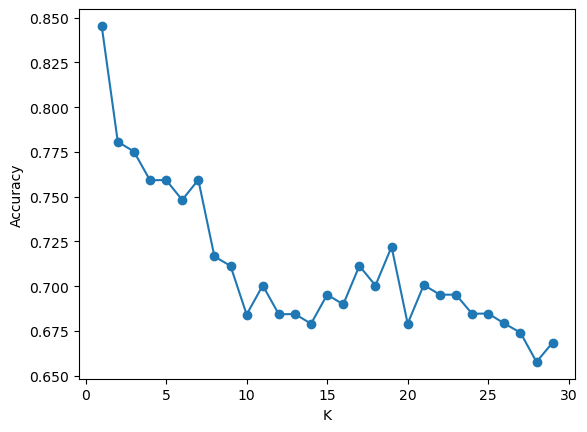

In [75]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

This graph shows how the accuracy of a K-Nearest Neighbors (KNN) classifier changes with different values of K (the number of neighbors). As K increases, the accuracy generally decreases, with the highest accuracy observed when K = 1. This suggests that the model performs best with a very small number of neighbors, possibly because the data is well-separated. However, the sharp drop in accuracy as K increases also indicates the model might be sensitive to the choice of K, and using too many neighbors can lead to underfitting. 

In [79]:
pred = full_cv_classifier.predict(X_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [83]:
confusion_matrix(y_test,pred)

array([[12,  1],
       [ 1,  7]])

In [85]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



## Final Results & Conclusion

The final **K-Nearest Neighbors (KNN)** classifier achieved an overall **accuracy of 90%** on the test data.  
From the **confusion matrix**, we observe only **2 misclassifications** (1 for each class), indicating that the model generalizes well.  
The **precision**, **recall**, and **F1-scores** are also high for both classes —  
- **0.92** for class **'M'**  
- **0.88** for class **'R'**

This shows **balanced and consistent performance** across both categories.

---

### Conclusion

The **Exploratory Data Analysis (EDA)** helped uncover meaningful trends in the frequency features, especially highlighting the **dominance of mid-range frequencies** and the **correlation patterns** among different bands.

KNN was selected as the classifier, and through **cross-validation**, it was found that **lower values of K (especially K = 1)** resulted in the best accuracy.

The final model demonstrated **strong predictive performance** with high accuracy and well-balanced class metrics, making it a **reliable choice** for this frequency-based classification task.